# Machine Learning in Life Scicence WS 2016 - 2017
## Exercise 1 - Dataset  
a) Create a dataset in R^2 with two classes (positive with target 1 and negative with target 0). Consider 100 datapoints for each class. Let the instances for each class be sampled from a bivariate Gaussian distribution with the same variance.

In [4]:
# Importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Settings
## Creating dataset here, 100 data points 
# numpy.random.multivariate_normal(mean, cov[size])
# Draw random samples from multivariate normal distribution
mean = [0, 0]
cov = [[0.7,0.5 ], [0.5, 0.5]] # diagonal variance 
n = 100 # number of points 
#Diagonal covariance means that points are oriented along x or y-axis

In [6]:
#Example taking from the website of sklearn
# Here we are considering "X" is for multivariate

x = np.random.multivariate_normal(mean, cov, n )

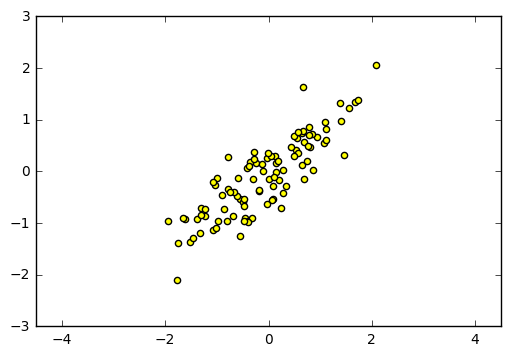

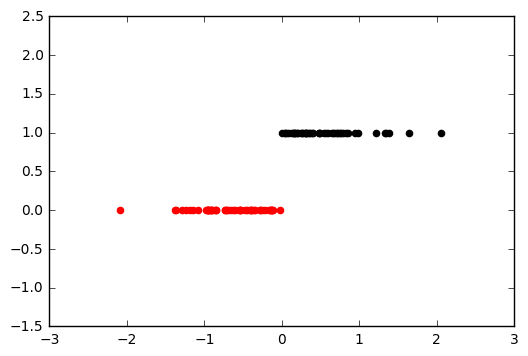

In [12]:
# Before plotting separate +ve and -ve values


XPositive = [val for val in x[:,1]  if val >= 0]
XNegative = [val for val in x[:,1]  if val < 0]
plt.scatter(x[:,0],x[:,1]  , c = 'yellow')
plt.axis('equal')
plt.show()

YPositive = [1] * len(XPositive)
YZero = [0] * len(XNegative)
plt.scatter(XPositive, YPositive, color='black')
plt.scatter(XNegative, YZero , color='red')
plt.axis('equal')
plt.show()


## Exercise 2 - Linear Model
a) Write the code to compute a Linear classification model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [14]:
#Apply Linear Model on different type of distributions
# Split the data into training/testing sets
trainX =XNegative[:-20]  +  XPositive[:-20]# take 80 sample dataset as a Training
testX = XNegative[-20:] +  XPositive[-20:] # take 20 sample datset for testing


# Split target also into training/ testing sets
trainY =  [0] * len(XNegative[:-20]) + [1] * len(XPositive[:-20])
testY =   [0] * len(XNegative[-20:]) + [1] * len(XPositive[-20:])


In [15]:
#Converting List to  array for parsing
trainX = np.asarray(trainX)
trainY= np.asarray(trainY)

trainX= trainX.reshape(trainX.size, 1)
trainY= trainY.reshape(trainY.size, 1)

testX = np.asarray(testX)
testX = testX.reshape(testX.size, 1)

testY =  np.asarray(testY)
testY = testY.reshape(testY.size,1)



Linear Model Starts Here:
Coefficients: [[ 0.54292384]]
[[-0.04761076]]
Mean squared error: 0.00
Variance score: 0.62


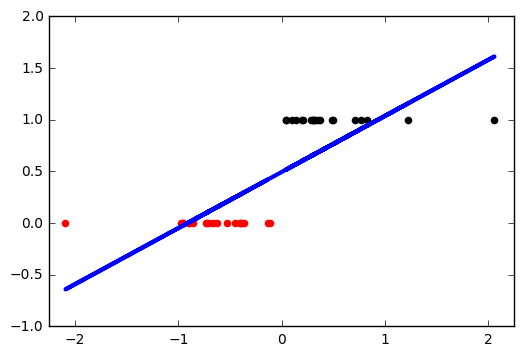

In [17]:
from sklearn import linear_model

#Using Linear Model 
print ('Linear Model Starts Here:')

#Intialize
regr = linear_model.LinearRegression()


# Fit
regr.fit(trainX, trainY);

# The Coefficients
print ('Coefficients:', regr.coef_)

#Predict
predictY = regr.predict(testX)
print(regr.predict(-1))
#The mean squared error
print("Mean squared error: %.2f" % np.mean((predictY) - testY) **2  ) # (y^ - y)^2

#Explained variance score: 1 is perfect
print ('Variance score: %.2f' % regr.score(testX, testY))
#plot outputs 
YPositive = [1] * len(XPositive[-20:])
YZero = [0] * len(XNegative[-20:])
plt.scatter(XPositive[-20:], YPositive, color='black')
plt.plot(testX, predictY, color='blue', linewidth=3)
plt.scatter(XNegative[-20:], YZero , color='red')


plt.axis('equal')
plt.show()

## Exercise 3 - kNN Model
a) Write the code to compute a KNN model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 